# ENVT3031 Practical 1: Accessing TERN Surveillance data with R

### This tutorial is modified from the "'AusplotsR' Package and AusPlots Data Basics"

Blanco-Martin, Bernardo (2019). Tutorial: "'AusplotsR' Package and AusPlots Data Basics". Terrestrial Ecology Research Network. Version 2019.06.0, June 2019. https://github.com/ternaustralia/TERN-Data-Skills/tree/master/EcosystemSurveillance_PlotData/AusPplots_BasicTutorial


## ECOSYSTEM SURVEILLANCE (AusPlots)  TUTORIAL: `ausplotsR` PACKAGE AND AusPlots DATA BASICS

This document contains a tutorial that provides an overview of the `ausplotsR` package functionality, as well as an introduction to TERN's Ecosystem Surveillance (AusPlots) data. TERN's Data Skills Development Program (DSDP) "ECOSYSTEM SURVEILLANCE (AusPlots)  TUTORIAL: UNDERSTANDING AND USING THE 'ausplotsR' PACKAGE AND AusPlots DATA" tutorial provides addtional information and multiple archetypal applications of AusPlots data and the `ausplotsR` package. Additional examples are provided in TERN's DSDP "ausplotsR Examples and Applications" R scripts. All of these materials can be found in TERN's DSDP 'EcosystemSurveillance_PlotData' folder in GitHub [here](https://github.com/ternaustralia/TERN-Data-Skills/tree/master/EcosystemSurveillance_PlotData). 

`ausplotsR` is an R package for live extraction and preparation of TERN AusPlots ecosystem monitoring data. Through `ausplotsR`, users can: (1) directly obtain plot-based data on vegetation and soils across Australia, and (2) preprocess these data into structures that facilitate the visualisation and analysis of ausplots data. Data preprocessing includes the computation of species occurrence, vegetation fractional and single cover, growth form, and basal area (see below for details).

The `ausplotsR` package currently includes 6 functions:

* `get_ausplots`: Extracts AusPlots data in R. The stating point for any AusPlots data exploration and analysis in R. 
* `species_table`: Generates species occurrence matrices using the chosen scoring method (i.e. presence/absence, cover, frequencey, or IVI index) from a data frame of individual raw intercept hits (generated from AusPlots data using the `get_ausplots` function).
* `fractional_cover`: Calculates fractional cover (i.e., the proportional cover of green vegetation, dead vegetation and bare substrate) from a data frame of individual raw intercept hits (generated from AusPlots data using the `get_ausplots` function).
* `growth_form_table`: Generates occurrence matrices for NVIS plant growth forms in plots using the chosen scoring method (i.e. presence/absence, percent cover or species richness -number of species assigned to a particular growth form-) from a data frame of individual raw intercept hits (generated from AusPlots data using the `get_ausplots` function).
* `single_cover_value`: Calculates a total vegetation cover by height and/or growh form per site from a data frame of individual raw intercept hits (generated from AusPlots data using the `get_ausplots` function). In this fucntion cover can be subsetted to vegetation over a specified height and/or by plant growth forms. By default, vegetation cover is calculated per plot for tree growth forms of 5 metres or higher (i.e. forests).
* `basal_area`: Calculates basal area (or number of basal wedge hits) for each plot using the raw basal wedge data (generated from AusPlots data using the `get_ausplots` function).


# Part 1: INSTALLING and LOADING `ausplotsR`

To run the R scripts in this tutorial the `ausplotsR` library must be installed and loaded.

The first step to install packages in R is selecting the CRAN (Comprehensive R Archive Network) mirror. Mirror selection and package installation can be done via R’s menu (Packages/Set CRAN mirror… followed by Packages/install package(s)…) or programmatically the via the function 'install.packages' (selecting the CRAN mirror using the argument 'repos'). Typically it is best to choose the cloud mirror (which automatically redirects to an appropriate server worldwide) or a mirror close to you (e.g. in your institution, country,..). A list of Comprehensive R Archive Network (CRAN) mirror URLs can be found here. Below are two examples of how to select a CRAN mirrors. In the first example the cloud mirror is selected, and in the second one an Australian mirror is selected. Before running this code you must uncomment (i.e. remove the '#' symbol) the line with the desired mirror. 

In [1]:
## Select the repository (i.e. CRAN mirror URL)
#my.repos = "https://cloud.r-project.org/"
#my.repos = "https://cran.csiro.au/"  # Example of an Australian mirror

Currently ausplotsR must be installed directly from github using the ‘devtools’ package, which must have been previously installed. The code below installs the 'devtools' package. Rather than directly providing the URL for a CRAN mirror, we could have provided the variable 'my.repos' to which we assigned a mirror above. 

Then the `devtools` library is loaded and the `ausplotsR` library installed from GitHub. The GitHub site for ausplotsR contains the latest developments and information on the package; it can be found at this link. Finally, the `ausplotsR` library is loaded to use in the tutorial. 

In [ ]:
## Install directly from github using the 'devtools' package
## Thus, 'devtools' must be previouly installed
install.packages("devtools", repos="https://cloud.r-project.org/")
library(devtools)
install_github("ternaustralia/ausplotsR", build_vignettes = TRUE)

## Load the package
library(ausplotsR)

Help on the `ausplotsR` package and a vignette with a guide on how to use the package can be obtained with the code below

In [3]:
#help(ausplotsR)
#browseVignettes(package="ausplotsR")

# Part 2: OBTAIN & EXPLORE AusPlots DATA: `get_ausplots` function

The `get_ausplots` function extracts and compiles AusPlots data. 

Data of specific types, sites, geographical locations, and/or species can be requested via the function arguments.

*DATA TYPES:* Up to 8 different types of data can be obtained by setting the corresponding arguments to TRUE/FALSE:

  * `site_info`: Site summary data. Includes (among others): plot and visit details, landform data, geographic coordinates, and notes. Included by default. Site summary data are stored in the `site.info` data frame.
  * `structural_summaries`: Site vegetation structural summaries. Site vegetation structural summary data are stored in the `struct.summ` data frame.
  * `veg.vouchers`: Complete set of species records for the plot determined by a herbarium plus ID numbers for silica-dried tissue samples. Included by default. Vegetation vouchers data are stored in the `veg.vouch` data frame. 
  * `veg.PI`: Point Intercept (PI) data. Includes data on: substrate, plant species, growth form and height, etc at each of (typically) 1010 points per plot. Included by default. Vegetation point intercept data are stored in the `veg.PI` data frame.
  * `basal.wedge`: Basal Wedge Data Raw Hits. These data are required for the calculation of Basal Area by Species by Plot. Basal wedge data are stored in the `veg.basal` data frame.
  * `soil_subsites`: Information on what soil and soil metagenomics samples were taken at nine locations across the plot and their identification barcode numbers. Soil and soil metagenomics data are stored in the `soil.subsites` data frame. 
  * `soil_bulk_density`: Soil bulk density. Soil bulk density data are stored in the `soil.bulk` data frame.
  * `soil_character`: Soil characterisation and sample ID data at 10 cm increments to a depth of 1 m. Soil characterisation and sample ID data are stored in the `soil.char` data frame.

*SPATIAL FILTERING:* AusPlot data can be spatially subset via the `get_ausplots` function arguments in two ways:

  * `my.Plot_IDs`: Character vector with the plots IDs of specific AusPlots plots. 
  * `bounding_box`: Spatial filter for selecting AusPlots based on a rectangular box, in the format of e.g. c(xmin, xmax, ymin, ymax). AusPlots spatial data are are in longlat, thus x is the longitude and y is the latitude of the box/extent object (e.g., c(120, 140, -30, -10)).  
  
*SPECIES FILTERING:* AusPlots data can also be subset by particular or sets of genus and/or species (i.e. as determined for the herbarium voucher) using the argument `species_name_search`. This optional argument takes the form of a character string indicating the terms to search and subset. Search terms are not case sensitive and do not require an exact taxonomic match (e.g. "Eucalyptus moderata","Eucalyptus", and "euca" are all acceptable search terms). 
Species Filtering behaviour slightly differs among Data Types (i.e. for the different types of created Data Frames):
* For `veg.vouch` and  `basal.wedge`, when these arguments are set to `TRUE`, `get_ausplots` returns data.frames with the corresponding data (i.e. voucher records and raw basal wedge data respectively) that match the species_name_search.
* For the remaing data types arguments, when these arguments are set to `TRUE`, `get_ausplots` returns data.frames with the corresponding data (e.g. point intercept data,...) for all plots where the species_name_search occurs. 

The R object resulting from calling `get_ausplots` is a list of data frames containing the requested AusPlots data. The list includes a data frame for each type of data requested (i.e. up to 8 data frames: 'site_info', 'structural_summaries',...) and an auto-generated citation for the data extracted. Please cite ausplotsR and the TERN AusPlots data you use. In each data frame the columns correspond to the variables supplied for each type of data and the number of rows (directly or indirectly) depends on the sites (i.e. via `my.Plot_IDs` or `bounding_box` if subsetted) or species (i.e. via `species_name_search` if subset) retrieved. 

There are several variables common to all data frames. These include `site_location_name`, `site_location_visit_id`, and `site_unique` (a combination of the previous two). These variables can be used to merge data frames. For example, the contents of two data frames can be combined using the common variable as a link (i.e. guidance to add the merged contents in the correct row). The variable `site_unique` is typically the best option to link data frames in a merge, as it is the most specific variable representing a single visit to a particular site and it should be used in most analyses. Otherwise, errors such including data from the wrong visit to a site can occur. 

In [ ]:
# Example 1: All available data (i.e. all data types) for 3 plots
# ===============================================================

# Obtain the data ('site_info', 'veg.vouchers', and 'veg.PI' are retrieve by default)
AP.data = get_ausplots( my.Plot_IDs=c("SATFLB0004", "QDAMGD0022", "NTASTU0002"),
                        structural_summaries=TRUE, basal.wedge=TRUE,
                        soil_subsites=TRUE, soil_bulk_density=TRUE, soil_character=TRUE  )

# Explore retrieved data
class(AP.data)
summary(AP.data)
str(AP.data)

In [ ]:
# Example 2: Default data for a particular Geographic Extent
# ==========================================================

# 'site_info', 'veg.vouchers', and 'veg.PI' data retrived for Adelaide (34.92866S  138.59863E) and its sourrounding area
AP.data = get_ausplots(bounding_box=c(138.1, 139.1, -34.5, -35.5))

# Explore retrieved data
class(AP.data)   # As in Example 1 (can run uncommented if curious) 
summary(AP.data)
str(AP.data)   # Similar to Example 1 (can run uncommented if curious) 

In [ ]:
# Example 3: 'Default data' + 'basal.wedge' + 'structural_summaries' for the genus Eucalyptus
# ===========================================================================================

# Default data frames ('site_info', 'veg.vouchers', and 'veg.PI') + 'basal.wedge' + structural_summaries data frames for the genus Eucalyptus
AP.data = get_ausplots(basal.wedge=TRUE, structural_summaries=TRUE, species_name_search="Eucalyptus") 

# Explore retrieved data
#class(AP.data)   # As in Example 1 (can run uncommented if curious) 
summary(AP.data)
#str(AP.data)   # Similar to Example 1 (can run uncommented if curious) 

# Explore species contained in each data frame
head(AP.data$veg.vouch) # Includes Records that match 'eucalyptus'
head(AP.data$veg.PI)  # Includes Plots where 'eucalyptus' occurs
head(AP.data$veg.basal)  # Includes Records that match 'eucalyptus'
head(AP.data$struct.summ)  # Includes Plots where 'eucalyptus' occurs

# Save an AusPlots derived Data Frame (generated for pre-processing), using 'write.csv'
# =====================================================================================

# Create Name of the file to be stored (including the date)
file.name = paste("eucalyptus_vouch",date.s,sep="_")
file.name
# Add the "txt" extension
file.name = paste(file.name,"csv",sep=".")
file.name

# Save the Basal Area data to a Text File with columns separated by tabs
write.csv(AP.data$veg.vouch, paste(file.path, file.name, sep="/"))

In [ ]:
# Example 4: 'site_info', 'veg.PI', and 'basal.wedge' data for all sites
# ======================================================================

# Retreive data
start.time = Sys.time()
AP.data = get_ausplots(veg.vouchers=FALSE, basal.wedge=TRUE) 
end.time = Sys.time()
end.time - start.time

# Explore 
#class(AP.data) # As in Example 1 (can run uncommented if curious) 
summary(AP.data)
#str(AP.data)   # Similar to Example 1 (can run uncommented if curious) 

# Explore 'site_info' data
dim(AP.data$site.info) # get the dimensions of the site.info DF
names(AP.data$site.info) # get the names of the site.info variables/parameters
head(AP.data$site.info) # Returns the first or last parts of the site.info DF

# Explore 'veg_PI' data
dim(AP.data$veg.PI) # get the dimensions of the veg.PI DF
names(AP.data$veg.PI) # get the names of the veg.PI variables/parameters
head(AP.data$veg.PI) # # Returns the first or last parts of the veg.PI DF

# Part 3: Manipulating AusPlots data I
### Subset data frames

The `get_ausplots` function extracts and compiles AusPlots data allowing substantial flexibility in the selection of the required data. Up to 8 different types of data can be retrieved into distinct data frames (i.e. data on sampling sites, vegetation structure, vegetation point intercept, vegetation vouchers, vegetation basal wedge, soil characterization, soil bulk density, and soil & soil metagenomics samples). In addition, data can be filtered for particular sets of plots and/or genus/species, as well as geographically using a rectangular bounding box. 

However, in some situations we are only interested in a subset of the data retrieved by `get_ausplots`. To subset ausplot data, we use the variables in the retrieved data frames corresponding to the concept by which we would like to filter the data. The data retrieved by the function 'get_ausplots' can be manipulated as any other R data. However, the 'deep' structure of the data (a list of multiple data frames) and interrelation of the data frames (via a common a common link variable) can make manipulating the data a bit more daunting. Below we explain and provide examples of the archetypical scenarios encountered when sub-setting AusPlots data retrieved with `ausplotsR`. An addtional (longer) example is presented in another TERN DSDP Tutorial ["Understanding and using the ‘ausplotsR’ package and AusPlots data" Tutorial](https://github.com/ternaustralia/TERN-Data-Skills/tree/master/EcosystemSurveillance_PlotData/AusPlots_Tutorial).

In some occasions sub-setting a single data frame (i.e. type of variables) is all what we need. Variables in the `site.info` data frame contain information that affect all other data frames; so typically after sub-setting the contents of the variable of interests in the `site.info` data frame, we will also subset the remaining datasets using one of the common variables among all data frames. Common variables among datasets include `site_location_name`, `site_location_visit_id`, and `site_unique`.  Commonly `site_unique` is the best option to ‘connect’ ausplots data frames, as it is the most specific variable representing a single visit to a particular site.

To subset a data frame we filter its data by querying the variable(s) of interest using operators. The variables of interest are typically factors, numerical, or boolean variables. Many variables retrieved by `get_ausplots` have a `char` class, despite conceptually falling in one of these 3 categories. Therefore, before using a variable to filter a data frame we must inspect its contents and class, and if required change its class to an adequate one. We use relational operators to filter individual variables, and logical (and occasionally arithmetic) operators to combine more than one variable in our filtering operations ([R Operators]( https://www.datamentor.io/r-programming/operator/)).
 

#### Part 3A: Sub-setting a Single Data Frame

We might be, for example, interested in point intercept data only for vegetation of a particular height, a particular growth form, growing on particular substrate type, or found in a particular set of transects. In these examples, we use the variables in the ‘veg.PI’ data frame to filter the retrieved ausplots data in this data frame. We do not need to subset any othe data frames.

##### Example 1: plant height 

Height is `numeric`, so there is no need to change its class

In [77]:
# ============================
# Sub-set a Single Data Frame
# ============================
# Here we filter by variables in the 'veg.PI' data frame

AP.data = get_ausplots( structural_summaries=TRUE, basal.wedge=TRUE,
                        soil_subsites=TRUE, soil_bulk_density=TRUE, soil_character=TRUE  )


# Height
# ======

# Explore Variable Type and Change to Numeric
# -------------------------------------------
class(AP.data$veg.PI$height)
summary(AP.data$veg.PI$height)

# Subset to Height (> 2 meters) in 'veg.PI' data frame
# ----------------------------------------------------
TreeGT2m.AP.data = AP.data
dim(TreeGT2m.AP.data$veg.PI)
#summary(AP.data$veg.PI$height)

# the following line is making a dataframe that is restricted to entries that are greater than 2 metres in height
TreeGT2m.AP.data$veg.PI = TreeGT2m.AP.data$veg.PI[TreeGT2m.AP.data$veg.PI$height > 2,] 

# these commands should now give different results from above to reflect the filtered dataframe
dim(TreeGT2m.AP.data$veg.PI) 
summary(TreeGT2m.AP.data$veg.PI$height)

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.1     0.4     2.2     2.6    34.0  392715 

[1] 773278     13

[1] 499932     13

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    2.0     3.7     6.0     6.8     9.0    34.0  392715 

##### Example 2: transect 

Transect is a `factor`, so there is no need to change its class


In [ ]:
# Transect
# ========

# Explore Variable Type and Change to Factor
# ------------------------------------------
class(AP.data$veg.PI$transect)
summary(AP.data$veg.PI$transect)


# Subset an specific Transect (E1-W1) in 'veg.PI' data frame
# ----------------------------------------------------------
E1W1Tr.AP.data = AP.data
dim(E1W1Tr.AP.data$veg.PI)
#summary(AP.data$veg.PI$transect)

# the following line is making a dataframe that is restricted to entries that are greater than 2 metres in height
E1W1Tr.AP.data$veg.PI = E1W1Tr.AP.data$veg.PI[E1W1Tr.AP.data$veg.PI$transect == "E1-W1",] 

levels(E1W1Tr.AP.data$veg.PI$transect)
E1W1Tr.AP.data$veg.PI$transect = droplevels(E1W1Tr.AP.data$veg.PI$transect)
levels(E1W1Tr.AP.data$veg.PI$transect)

# these commands should now give different results from above to reflect the filtered dataframe
dim(E1W1Tr.AP.data$veg.PI)
summary(E1W1Tr.AP.data$veg.PI$transect)

##### Example 3: plant growth form

Transect is a `character` variable, so we need to change its class to `factor` 


In [ ]:
# Growth Form
# ===========

# Explore Variable Type and Change to Factor in 'veg.PI' data frame
# -----------------------------------------------------------------
class(AP.data$veg.PI$growth_form)
# summary(AP.data$veg.PI$growth_form)
AP.data$veg.PI$growth_form.f = factor(AP.data$veg.PI$growth_form)
# summary(AP.data$veg.PI$growth_form.f)

# Subset to the Tree/Palm Growth Form
# -----------------------------------
TreePalm.AP.data = AP.data
dim(TreePalm.AP.data$veg.PI)
#summary(AP.data$veg.PI$growth_form.f)

# the following line is making a dataframe that is restricted to entries that are the growth form Tree/Palm
TreePalm.AP.data$veg.PI = TreePalm.AP.data$veg.PI[TreePalm.AP.data$veg.PI$growth_form.f == "Tree/Palm",] 

levels(TreePalm.AP.data$veg.PI$growth_form.f)
TreePalm.AP.data$veg.PI$growth_form.f = droplevels(TreePalm.AP.data$veg.PI$growth_form.f)
levels(TreePalm.AP.data$veg.PI$growth_form.f)

dim(TreePalm.AP.data$veg.PI)
summary(TreePalm.AP.data$veg.PI$growth_form.f)

#### Park 3B: Sub-setting All Data Frames

In some occasions, we are interested in sites located at particular states or bioregions. Alternatively, we might be only interested on data obtained in sites on steep slopes and/or with a slope facing (i.e. aspect) south. In these examples, we can use the variables in the `site.info` data frame to filter the sites of interest. In this case, we also need to subset the data in the remaining data frames, as we are only interested in data that has been collected in sites with particular characteristics. Therefore, we filter the other data frames by site, selecting the sites filtered out in our first sub-setting operation on the `site.info` data frame. To do so we use one of the variables present in all data frames that contain a site identifier (i.e. using `site_location_name`, `site_location_visit_id`, or `site_unique`; see above).

##### Example 1: Site Slope

Site Slope is a `character` variable, so we need to change its class to `numeric` 

In [ ]:
# =======================
# Sub-set All Data Frames
# =======================
# Here we filter by variables in the 'veg.PI' data frame


# Site Slope
# ==========

# Explore Variable Type and Change to Numeric
# -------------------------------------------
class(AP.data$site.info$site_slope)
# summary(AP.data$site.info$site_slope)
AP.data$site.info$site_slope.n = as.numeric(AP.data$site.info$site_slope)
summary(AP.data$site.info$site_slope.n)


# Subset to Plos with Steep Slopes (> 20 degrees) in 'site.info' data frame
# -------------------------------------------------------------------------
slope.AP.data = AP.data
dim(slope.AP.data$site.info)
#summary(AP.data$site.info$site_slope.n)
slope.AP.data$site.info = slope.AP.data$site.info[slope.AP.data$site.info$site_slope.n >= 20,] 
dim(slope.AP.data$site.info)
summary(slope.AP.data$site.info$site_slope.n)


# Subset to Plots with Steep Slopes in other Data Frames
# ------------------------------------------------------
# To do so we use the common variable 'site_unique'

# Subset in 'veg.PI' Data Frame
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dim(slope.AP.data$veg.PI)
slope.AP.data$veg.PI = slope.AP.data$veg.PI[slope.AP.data$veg.PI$site_unique %in% slope.AP.data$site.info$site_unique, ]
dim(slope.AP.data$veg.PI)

# Subset in 'veg.basal' Data Frame
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dim(slope.AP.data$veg.basal)
slope.AP.data$veg.basal = slope.AP.data$veg.basal[slope.AP.data$veg.basal$site_unique %in% slope.AP.data$site.info$site_unique, ]
dim(slope.AP.data$veg.basal)

##### Example 2: Site Aspect

Site Aspect is a `character` variable, so we need to change its class to `numeric` 

In [ ]:
# Site Aspect
# ===========

# Explore Variable Type and Change to Numeric
# -------------------------------------------
class(AP.data$site.info$site_aspect)
summary(AP.data$site.info$site_aspect)
AP.data$site.info$site_aspect.n = as.numeric(AP.data$site.info$site_aspect)
summary(AP.data$site.info$site_aspect.n)

# Subset to Plots with a South (SE to SW; i.e. 135 to 225) Aspect in 'site.info' data frame
# -----------------------------------------------------------------------------------------
aspect.AP.data = AP.data
dim(aspect.AP.data$site.info)
#summary(AP.data$site.info$site_aspect.n)
aspect.AP.data$site.info = aspect.AP.data$site.info[(aspect.AP.data$site.info$site_aspect.n > 135 &
aspect.AP.data$site.info$site_aspect.n <= 225),] 
dim(aspect.AP.data$site.info)
summary(aspect.AP.data$site.info$site_aspect.n)

# Subset to Plots with a South (SE to SW) Aspect in other Data Frames
# -------------------------------------------------------------------
# To do so we use the common variable 'site_unique'

# Subset in 'veg.PI' Data Frame
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dim(aspect.AP.data$veg.PI)
aspect.AP.data$veg.PI = aspect.AP.data$veg.PI[aspect.AP.data$veg.PI$site_unique %in% aspect.AP.data$site.info$site_unique, ]
dim(aspect.AP.data$veg.PI)

# Subset in 'veg.basal' Data Frame
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dim(aspect.AP.data$veg.basal)
aspect.AP.data$veg.basal = aspect.AP.data$veg.basal[aspect.AP.data$veg.basal$site_unique %in% aspect.AP.data$site.info$site_unique, ]
dim(aspect.AP.data$veg.basal)

##### Example 3: State

State is a `character` variable, so we need to change its class to `factor` 

In [ ]:
# State
# =====

# Explore Variable Type and Change to Factor
# ------------------------------------------
class(AP.data$site.info$state)
summary(AP.data$site.info$state)
AP.data$site.info$state.f = factor(AP.data$site.info$state); # change variable to factor
summary(AP.data$site.info$state.f);


# Subset to Plots in the State of South Australia in 'site.info' data frame
# --------------------------------------------------------------------
# Subset to "SA"
SA.AP.data = AP.data
dim(SA.AP.data$site.info);


In [ ]:
#summary(AP.data$site.info$state.f)
SA.AP.data$site.info = SA.AP.data$site.info[SA.AP.data$site.info$state.f == "SA",] 
levels(SA.AP.data$site.info$state.f)
SA.AP.data$site.info$state.f = droplevels(SA.AP.data$site.info$state.f)
levels(SA.AP.data$site.info$state.f)
dim(SA.AP.data$site.info)
summary(SA.AP.data$site.info$state.f)


# Subset to Plots iw the State of South Australia in other Data Frames
# ---------------------------------------------------------------
# To do so we use the common variable 'site_unique'

# Subset in 'veg.PI' Data Frame
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dim(SA.AP.data$veg.PI)
SA.AP.data$veg.PI = SA.AP.data$veg.PI[SA.AP.data$veg.PI$site_unique %in% SA.AP.data$site.info$site_unique, ]
dim(SA.AP.data$veg.PI)

# Subset in 'veg.basal' Data Frame
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dim(SA.AP.data$veg.basal)
SA.AP.data$veg.basal = SA.AP.data$veg.basal[SA.AP.data$veg.basal$site_unique %in% SA.AP.data$site.info$site_unique, ]
dim(SA.AP.data$veg.basal)

##### Example 4: Bioregion name

Bioregion name is a `character` variable, so we need to change its class to `factor` 

In [ ]:
# Bioregion name
# ==============

# Explore Variable Type and Change to Factor
# ------------------------------------------
class(AP.data$site.info$bioregion_name)
summary(AP.data$site.info$bioregion_name)
AP.data$site.info$bioregion_name.f = factor(AP.data$site.info$bioregion_name)
summary(AP.data$site.info$bioregion_name.f)


# Subset to Plots in Bioregions in the south central South Australia in 'site.info' data frame
# --------------------------------------------------------------------------------------------------
# Subset to "FLB" (Flinders Lofty Block), "EYB" (Eyre Yorke Block), "KAN" (Kanmantoo) and "MDD" (Murray Darling Depression)
EGCBioregs.AP.data = AP.data
dim(EGCBioregs.AP.data$site.info)
#summary(AP.data$site.info$bioregion_name.f)


SA.Bioreg = c('FLB', 'EYB', 'KAN', 'MDD')
EGCBioregs.AP.data$site.info = EGCBioregs.AP.data$site.info[EGCBioregs.AP.data$site.info$bioregion_name.f %in% SA.Bioreg,] 
levels(EGCBioregs.AP.data$site.info$bioregion_name.f)
EGCBioregs.AP.data$site.info$bioregion_name.f = droplevels(EGCBioregs.AP.data$site.info$bioregion_name.f)
levels(EGCBioregs.AP.data$site.info$bioregion_name.f)
dim(EGCBioregs.AP.data$site.info)
summary(EGCBioregs.AP.data$site.info$bioregion_name.f)


# Subset to Plots in Bioregions in south central South Australia in other Data Frames
# ---------------------------------------------------------------------------------------------
# To do so we use the common variable 'site_unique'

# Subset in 'veg.PI' Data Frame
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dim(EGCBioregs.AP.data$veg.PI)
EGCBioregs.AP.data$veg.PI = EGCBioregs.AP.data$veg.PI[EGCBioregs.AP.data$veg.PI$site_unique %in% EGCBioregs.AP.data$site.info$site_unique, ]
dim(EGCBioregs.AP.data$veg.PI)

# Subset in 'veg.basal' Data Frame
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dim(EGCBioregs.AP.data$veg.basal)
EGCBioregs.AP.data$veg.basal = EGCBioregs.AP.data$veg.basal[EGCBioregs.AP.data$veg.basal$site_unique %in% EGCBioregs.AP.data$site.info$site_unique, ]
dim(EGCBioregs.AP.data$veg.basal)

In [ ]:
# Save an AusPlots derived Data Frame (generated for pre-processing), using 'write.csv'
# =====================================================================================

# Create Name of the file to be stored (including the date)
file.name = paste("basal_test1",date.s,sep="_")
file.name
# Add the "txt" extension
file.name = paste(file.name,"csv",sep=".")
file.name

# Save the Basal Area data to a Text File with columns separated by tabs
write.csv(EGCBioregs.AP.data$site.info, paste(file.path, file.name, sep="/"))


#### Part 3C: SPECIES-LEVEL DATA
##### `species_table` function and species occurrence matrices

The `species_table` function in the `ausplotsR` package is used to generate a species occurrence matrix from AusPlots raw data. The species occurence matrix can be then used in multiple applications that require species-level data. For example, it can be used to investigate patterns of presence/absence and/or abundance (note that vegetation 'cover' is used as a surrogate for vegetation 'abundance'), compute indices of species diversity, or elaborate rank-abundance plots. 

The `species_table` function takes a data frame of individual raw point intercept hits (i.e. a veg.PI data frame) generated using the `get_ausplots` function, and returns a ‘species against sites’ matrix. Four metrics can be selected to score species occurrence:

* _Presence/Absence:_ Set by the argument `m_kind = PA`.
* _Percent Cover:_ Based on total frequency of hits. This is the most commonly used metric. Set by the argument `m_kind = percent_cover`.
* _Frequency:_ Based on proportional frequencies of presence on the 10 individual transects within a plot. Set by the argument `m_kind = freq`. It can be a measure of importance for low cover species.
* _IVI:_ A combination of cover and frequency. Set by the argument `m_kind = IVI`.

If _Percent Cover_ or _IVI_ are used two types of cover type can be selected:

* _Projected Foliage Cover (PFC):_ Hits scored as ‘in canopy sky’ are removed. Set by the argument `cover_type = PFC`.
* _Opaque Canopy Cover (OCC):_ Hits scored as ‘in canopy sky’ are retained. Set by the argument `cover_type = OCC`.


Examples of the different arguments combinations in the `species_table` function are presented below. Species occurrence matrices are computed for the full set of vegetation point intersect data currently available at AusPlots. The list of data frames containing information for all currently available AusPlots sites (i.e. the 'AP.data' list) was previously created using the `get_ausplots` function (see above). The class and dimensions of the returned data frame are the same in all examples, so they are only displayed for the first example (the corresponding code is commented out in the other examples). The resulting species occurrence data frames can be enriched with additional information as we will see in the next section ('Manipulating AusPlots data II: Merging data frames'). 

In [ ]:
# ===========================================================================
# SPECIES-LEVEL DATA: 'species_table' function and species occurence matrices
# ===========================================================================

# Scoring metric: Presence/Absence
# ================================
AP.data.SppbySites.PA = species_table(AP.data$veg.PI, m_kind="PA")
class(AP.data.SppbySites.PA)
dim(AP.data.SppbySites.PA) # Number of rows and columns in the matrix: Sites x Species
AP.data.SppbySites.PA[1:5, 1:5]
summary(AP.data.SppbySites.PA[,1:3])

In [ ]:
# Scoring metric: Percent Cover
# =============================

# Cover Type: Projected foliage cover (PFC)
# -----------------------------------------
# Hits scoered as 'in canopy sky' are removed
AP.data.SppbySites.PcC.PFC = species_table(AP.data$veg.PI, m_kind="percent_cover", cover_type="PFC")
#class(AP.data.SppbySites.PcC.PFC)
#dim(AP.data.SppbySites.PcC.PFC) # Number of rows and columns in the matrix: Sites x Species
#AP.data.SppbySites.PcC.PFC[1:5, 1:5]
summary(AP.data.SppbySites.PcC.PFC[,1:3])

# Cover Type: Opaque Canopy Cover (OCC)
# -------------------------------------
# Hits scoered as 'in canopy sky' are retained
AP.data.SppbySites.PcC.OCC = species_table(AP.data$veg.PI, m_kind="percent_cover", cover_type="OCC")
#class(AP.data.SppbySites.PcC.OCC)
#dim(AP.data.SppbySites.PcC.OCC) # Number of rows and columns in the matrix: Sites x Species
#AP.data.SppbySites.PcC.OCC[1:5, 1:5]
summary(AP.data.SppbySites.PcC.OCC[,1:3])


# Scoring metric: Frequency
# =========================
AP.data.SppbySites.Freq = species_table(AP.data$veg.PI, m_kind="freq")
#class(AP.data.SppbySites.Freq)
#dim(AP.data.SppbySites.Freq) # Number of rows and columns in the matrix: Sites x Species
#AP.data.SppbySites.Freq[1:5, 1:5]
summary(AP.data.SppbySites.Freq[,1:3])


# Scoring metric: IVI
# ===================

# Cover Type: Projected foliage cover (PFC)
# -----------------------------------------
# Hits scoered as 'in canopy sky' are removed
AP.data.SppbySites.IVI.PFC = species_table(AP.data$veg.PI, m_kind="IVI", cover_type="PFC")
#class(AP.data.SppbySites.IVI.PFC)
#dim(AP.data.SppbySites.IVI.PFC) # Number of rows and columns in the matrix: Sites x Species
#AP.data.SppbySites.IVI.PFC[1:5, 1:5]
summary(AP.data.SppbySites.IVI.PFC[,1:3])

# Cover Type: Opaque Canopy Cover (OCC)
# -------------------------------------
# Hits scoered as 'in canopy sky' are retained
AP.data.SppbySites.IVI.OCC = species_table(AP.data$veg.PI, m_kind="IVI", cover_type="OCC")
#class(AP.data.SppbySites.IVI.OCC)
#dim(AP.data.SppbySites.IVI.OCC) # Number of rows and columns in the matrix: Sites x Species
#AP.data.SppbySites.IVI.OCC[1:5, 1:5]
summary(AP.data.SppbySites.IVI.OCC[,1:3])

# Part 4 Manipulating AusPlots data II: Merging data frames

The `ausplotsR` package functions help as pre-processing the AusPlots data extracted with the `get_ausplots` function into data frames useful for data analysis. For example, the `species_table` function generates a 'species occurrence by site' matrix (contained in a data frame) from AusPlots raw data (i.e. from point intercept hits in the `veg.PI` data frame created by the `get_ausplots` function).  

However, often we want to enrich the data in these derived data frames with additional information. Typically we need to add some information about the sites were the plot data was collected from `site.info` data frame (automatically created by the `get_ausplots` function. For example, we would like add to the 'species occurrence by site' data frame information about the [IBRA7 bioregion](https://www.environment.gov.au/land/nrs/science/ibra), longitude and latitude of the plot sites. To do so we need to merge the `species_table` and `site.info` data frames, using all the variables in the former data frame and the three required variables in the latter data frame in the merge. 

The `merge` function in the `base` package (i.e. it is provided with initial R installation) merges two data frames by common columns or row names (or other versions of database join operations). We need to provide (at least) the following arguments to the `merge` function:

* _Data frames (or objects)_ to be coerced into one (arguments `x` and `y`).
* _Columns used for merging:_ By default the data frames are merged on the columns with names that they both have (argument `by`), but separate specifications of the columns can be given by the arguments `by.x` and `by.y`. 
* _Columns to merge:_ We can provide the names of the columns we want to include in the merge between `[]`, in a similar fashion to when we access columns in a data frame. To include all the columns in a data frame the `names` function in the `base` package can be used. The arguments `all`, `all.x`, `all.y` can also be used for, in SQL terminology, a 'full outer joint', a 'left outer join', and a 'right outer join' respectively (i.e. returning unmatched rows form both tables, the left table, and the right table respectively). 

An example merging all the data in a `species_table` data frame and the variables `bioregion_name`, `longitude`, and `latitude` in the `site.info` data frame is presented below. Before proceeding with the merging, we create a `site_unique` variable in the `species_table` data frame to have a common column for merging. The `site_unique` variable contains a unique id for each site. The required data to create the this variables is present as 'rownames' in the `species_table` data frame.  

We end the example by creating a new column (`Tot_PcC`) containing the Total Percentance Cover from the original values in the `species_table` data frame and plotting a buble plot representing the Total Percentage Cover in space. To create this plot we use three of the variables we added to the original `species_table` data frame, `Tot_PcC`, `longitude`, and `latitude` (the latter two were added in the data frames merge). We use funtions in the `ggplot2` data visualisation package to generate this plot. More sofisticated graphs of AusPlots data, including graphs of site metrics over a map of Australia, are constructed and displayed in the TERN's DSDP ['ECOSYSTEM SURVEILLANCE (AusPlots) TUTORIAL: UNDERSTANDING AND USING THE ‘ausplotsR’ PACKAGE AND AusPlots DATA'](https://github.com/ternaustralia/TERN-Data-Skills/tree/master/EcosystemSurveillance_PlotData/AusPlots_Tutorial) tutorial.

[1]  683 3780

[1]  683 3783

[1] "Zygophyllum.simile" "Zygophyllum.sp."    "site_unique"       
[4] "bioregion_name"     "longitude"          "latitude"

[1] "Zygophyllum.sp." "site_unique"     "bioregion_name"  "longitude"      
[5] "latitude"        "Tot_PcC"

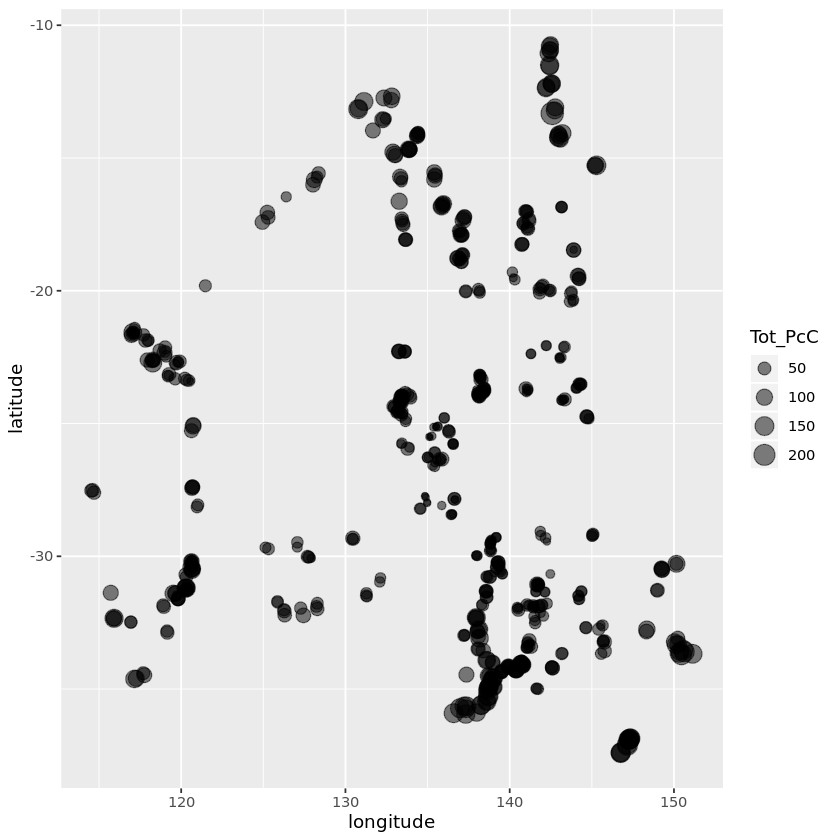

In [28]:
# ==================
# Meging data frames
# ==================

# Add the Unique ID ('site_unique') to the Species Occurrence Data Frame
# ----------------------------------------------------------------------
AP.data.SppbySites.PcC.PFC$site_unique = rownames(AP.data.SppbySites.PcC.PFC)
dim(AP.data.SppbySites.PcC.PFC)


# Merge Data Frames by Unique ID ('site_unique')
# ----------------------------------------------
# Include all Variables in Species Occurrence Data Frame. To do so use 'names' function,
# and 3 variables in the AP.data$site.info Data Frame (bioregion_name.f, longitude, and latitude)
AP.data.SppbySites.PcC.PFC = merge(AP.data.SppbySites.PcC.PFC, AP.data$site.info, 
                                   by="site_unique")[,c(names(AP.data.SppbySites.PcC.PFC), 
                                    "bioregion_name", "longitude", "latitude")]
dim(AP.data.SppbySites.PcC.PFC)
tail(names(AP.data.SppbySites.PcC.PFC))


# Plot
# ----

# Simple version
#plot(AP.data.SppbySites.PcC.PFC$longitude, AP.data.SppbySites.PcC.PFC$latitude, 
#     xlab="Longitude (degrees)", ylab="Latitude (degrees)")

# Compute variable containing the Total Percent Cover per Site ('Tot_PcC')
# '-4' 'cos we have added: 'site_unique', 'bioregion_name', 'logitude', 'latitude'.
AP.data.SppbySites.PcC.PFC$Tot_PcC = rowSums(AP.data.SppbySites.PcC.PFC[,1:(dim(AP.data.SppbySites.PcC.PFC)[2]-4)])
tail(names(AP.data.SppbySites.PcC.PFC))

# Plot using functions in 'ggplot2' package
library(ggplot2)
ggplot(AP.data.SppbySites.PcC.PFC, aes(x=longitude, y=latitude)) + geom_point(aes(size=Tot_PcC), alpha=0.5)

# Part 5: PROPORTIONAL VEGETATION COVER (= FRACTIONAL COVER)
## `fractional_cover` function

The `fractional_cover` function in the `auscoverR` package calculates fractional cover from AusPlots point intercept (PI) data (as generated by `get_ausplots`). Fractional cover refers to the proportions of green vegetation, dead vegetation and bare substrate cover. Cover fractions are assigned as follows:
* _‘Green’_ or _‘photosynthetic vegetation’_: is living vascular plant cover.
* _‘Brown’_ or _‘non-photosynthetic vegetation’_: is either vascular plant cover scored as ‘dead’, or substrate scored as litter, coarse woody debris or cryptogam (see below) that has no other veg cover.
* _‘Bare’_ or _‘bare ground’_: is rock, outcrop, gravel or bare soil with no veg cover substrate.

Typically, 1010 intercept points are used to compute fractional cover in a plot. These 1010 intercept points correspond to 101 points per transect (i.e. 101 points at 1 meters intervals in each of the 100 metres long transect) x 10 transects (5 transects oriented North to South and 5 oriented East to West). Further details about the AusPlots methods can be found in TERN's DSDP [AusPlots Methods Knowledge Base](https://ternaus.atlassian.net/wiki/spaces/ESM/pages/651329908/Ecosystem+Surveillance+Monitoring+-+AusPlots+Methods) and the [AusPlots Rangelands Survey Protocol Manual](https://www.tern.org.au/AusPlots-Rangelands-Survey-Protocols-Manual-pg23944.html). The percentage scored for each fraction is computed as the number of hits assigned to each fraction times 100 divided by the total number of PIs taken (usually 1010, but this number can vary).

A height rule is applied, so that scoring the green/brown/bare fraction from point intercept hits of the uppermost vegetation/substrate stratum overrides the others. That is, a dead tree overrides a living shrub beneath and vice versa. Similarly, any vegetation cover overrides substrate coding, etc. This means for each of the intercepts, there is a single coding. 

Arguments:
* `ground_fractional`: When set to ‘TRUE’ it computes fractional cover exclusively for Ground Cover. That is, fractional cover is computed only for grasses (hummock, tussock, other); sedge; rush; forb; fern; and vine plant growth forms. Presently, cryptogam cover is excluded, and included in the non-photosynthetic fraction instead. The default for this argument is ‘FALSE’.
* `in_canopy_sky`: With the default value (`in_canopy_sky = FALSE`), only the substrate is considered for those hits. This argument applies only to regular fractional cover (i.e. for `ground_fractional = FALSE`), as trees are excluded in the green fraction for ground fractional cover by default.

Occasionally, substrate type was not collected (i.e. ‘NC’) or could not be assigned to one of the above categories (i.e. ‘Unknwn’). In these cases, if there was no vegetation cover above those points percent cover is scored as an ‘NA’ fraction.

The `fractional_cover` function returns a data frame. In this data frame rows denote plots, columns denote fractions (i.e. bare, brown, green, and NA), and values are cover percentages.

Examples of the use of the `fractional_cover` funtion are presented below. In the examples, different flavours of Fractional Cover are computed by varying the argument values (see above). Fractional cover is computed for the full set of vegetation point intersect data currently available at AusPlots, so running these examples might take a little bit of time (between 1.6 and 1.9 minutes per example in my machine). The list of data frames containing information for all currently available AusPlots sites (i.e. the 'AP.data' list) was previously created using the `get_ausplots` function (see above). The resulting 'Fractional Cover' data frames can be enriched with additional information as seen above for the `species_table` function in the 'Manipulating AusPlots data II: Merging data frames' section.

In [30]:
# ===============================================================================
# PROPORTIONAL VEGETATION COVER (= FRACTIONAL COVER): 'fractional_cover' function
# ===============================================================================

# Fractional Cover: 'Regular' Fractional Cover, only for Substrate
# ================================================================
# I.e.: Function call with the default argument values
AP.data.FC.RFC.Substrate = fractional_cover(AP.data$veg.PI, ground_fractional="FALSE", in_canopy_sky="FALSE")
class(AP.data.FC.RFC.Substrate)
dim(AP.data.FC.RFC.Substrate)
head(AP.data.FC.RFC.Substrate)
summary(AP.data.FC.RFC.Substrate)

# Fractional Cover: 'Regular' Fractional Cover, including Trees
# =============================================================
AP.data.FC.RFC.Trees = fractional_cover(AP.data$veg.PI, ground_fractional="FALSE", in_canopy_sky="TRUE")
#class(AP.data.FC.RFC.Trees)
#dim(AP.data.FC.RFC.Trees)
head(AP.data.FC.RFC.Trees)
summary(AP.data.FC.RFC.Trees)

# Fractional Cover: Fractional Ground Cover
# =========================================
AP.data.FC.RFC.Trees = fractional_cover(AP.data$veg.PI, ground_fractional="TRUE")
#class(AP.data.FC.RFC.Trees)
#dim(AP.data.FC.RFC.Trees)
head(AP.data.FC.RFC.Trees)
summary(AP.data.FC.RFC.Trees)

Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“there are records with missing times, which will be dropped.”

[1] "data.frame"

[1] 683   5

,site_unique,bare,brown,green,NA.
NSABBS0001-58580,NSABBS0001-58580,7.52,55.05,37.33,0.1
NSABBS0002-58555,NSABBS0002-58555,17.13,42.18,40.59,0.1
NSABBS0003-58581,NSABBS0003-58581,3.76,45.84,50.40,0.0
NSABBS0004-58556,NSABBS0004-58556,3.07,34.95,61.98,0.0
NSABBS0005-58582,NSABBS0005-58582,1.09,39.60,59.31,0.0
NSABBS0006-58557,NSABBS0006-58557,3.17,32.67,64.06,0.1


 site_unique             bare           brown           green      
 Length:683         Min.   : 0.00   Min.   : 0.00   Min.   : 0.10  
 Class :character   1st Qu.: 9.06   1st Qu.:20.69   1st Qu.:23.17  
 Mode  :character   Median :22.08   Median :29.60   Median :38.81  
                    Mean   :27.42   Mean   :30.66   Mean   :41.63  
                    3rd Qu.:42.33   3rd Qu.:39.92   3rd Qu.:56.88  
                    Max.   :98.71   Max.   :77.82   Max.   :97.92  
      NA.         
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.2854  
 3rd Qu.: 0.0000  
 Max.   :69.9000  

Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“there are records with missing times, which will be dropped.”

,site_unique,bare,brown,green,NA.
NSABBS0001-58580,NSABBS0001-58580,7.03,47.82,45.05,0.1
NSABBS0002-58555,NSABBS0002-58555,17.13,41.78,40.99,0.1
NSABBS0003-58581,NSABBS0003-58581,3.47,41.78,54.75,0.0
NSABBS0004-58556,NSABBS0004-58556,2.57,29.60,67.82,0.0
NSABBS0005-58582,NSABBS0005-58582,1.09,36.53,62.38,0.0
NSABBS0006-58557,NSABBS0006-58557,2.77,27.33,69.80,0.1


 site_unique             bare           brown           green      
 Length:683         Min.   : 0.00   Min.   : 0.00   Min.   : 0.10  
 Class :character   1st Qu.: 8.66   1st Qu.:18.96   1st Qu.:25.10  
 Mode  :character   Median :21.58   Median :28.10   Median :41.68  
                    Mean   :27.08   Mean   :29.00   Mean   :43.63  
                    3rd Qu.:41.78   3rd Qu.:37.95   3rd Qu.:61.48  
                    Max.   :98.71   Max.   :72.67   Max.   :97.92  
      NA.         
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.2819  
 3rd Qu.: 0.0000  
 Max.   :69.9000  

Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“there are records with missing times, which will be dropped.”

,site_unique,bare,brown,green,NA.
NSABBS0001-58580,NSABBS0001-58580,9.70,85.25,4.95,0.1
NSABBS0002-58555,NSABBS0002-58555,25.05,68.02,6.83,0.1
NSABBS0003-58581,NSABBS0003-58581,5.94,94.06,0.00,0.0
NSABBS0004-58556,NSABBS0004-58556,6.73,93.07,0.10,0.1
NSABBS0005-58582,NSABBS0005-58582,1.58,98.42,0.00,0.0
NSABBS0006-58557,NSABBS0006-58557,5.35,94.36,0.20,0.1


 site_unique             bare           brown           green      
 Length:683         Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 Class :character   1st Qu.:12.57   1st Qu.:33.81   1st Qu.: 3.76  
 Mode  :character   Median :25.74   Median :50.79   Median :11.98  
                    Mean   :30.65   Mean   :51.90   Mean   :17.04  
                    3rd Qu.:46.46   3rd Qu.:71.69   3rd Qu.:25.59  
                    Max.   :99.60   Max.   :98.42   Max.   :97.92  
      NA.         
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.3979  
 3rd Qu.: 0.1000  
 Max.   :82.0800  

# Part 6: Plant Growth Form data
## `growth_form_table` function

The `growth_form_table` function in the `ausplotR` package can be used to generate occurrence matrices for plant growth forms in the AusPlots plots. The plant growth forms considered are those in the National Vegetation Information System (NVIS; Executive Steering Committee for Australian Vegetation Information, 2003). 

The input for the `growth_form_table` function is a data frame of raw AusPlots point intercept data generated using the `get_ausplots function`. Three metrics can be selected to score species growth form:
* _Presence/Absence_: Set by the argument `m_kind = "PA"`.
* _Percent Cover_: Based on total frequency of hits. Set by the argument `m_kind = "percent_cover"`. This is the most useful and commonly used metric. It can be subsequently used in statistical analyses (e.g. MANOVA, Ordination, Classification, etc.) at continental scale where species turnover is too high for some methods to provide meaningful results.
* _Species Richness_: Set by the argument `m_kind = "richness"`. Note that when 'm_kind' is set to "richness" the rowSums of the occurrence matrix can be higher than the observed SR because in some occasions the same species is recorded with different growth forms in a plot and therefore the same species can count towards the weights for multiple growth forms.

When Percent Cover is used two types of cover type can be selected:
* _Projected Foliage Cover (PFC)_: Hits scored as 'in canopy sky' are removed. Set by the argument `cover_type = "PFC"`.
* _Opaque Canopy Cover (OCC)_: Hits scored as 'in canopy sky' are retained. Set by the argument `cover_type = "OCC"`.
The output of the `growth_form_table` function is a data frame. In this output data frame rows correspond to unique sites, columns to NVIS plant growth forms, and cell values are either Presence/Absences, Percent Cover, or Species Richness depending on the option chosen for the ‘m_kind’ argument.


REFERENCES  
*National Vegetation Information System, Version 6.0*
Executive Steering Committee for Australian Vegetation Information (ESCAVI)  
Department of the Environment and Heritage, 2003  
ISBN 0 642 54953 2.


Examples of the use of the 'growth_form_table' funtion are presented below. In the examples growth form ocurrences are computed using different scoring metrics (i.e. Presence/Absence, Percentage Cover, and Species Richness) by varying the argument values (see above). Growth form types occurrences are computed for the full set of vegetation point intersect data currently available at AusPlots. The list of data frames containing information for all currently available AusPlots sites (i.e. the 'AP.data' list) was previously created using the `get_ausplots` function (see above). The resulting 'Plant Growth Form' data frames can be enriched with additional information as seen above for the `species_table` function in the 'Manipulating AusPlots data II: Merging data frames' section.

In [ ]:
# ====================================================
# PLANT GROWTH FORM DATA: 'growth_form_table' function
# ====================================================

# NVIS Plant Growth Forms Occurrence Matrix,' Presence/Absence' scoring metric
# ============================================================================
AP.data.PGF.PA = growth_form_table(AP.data$veg.PI, m_kind="PA")
class(AP.data.PGF.PA)
dim(AP.data.PGF.PA)
head(AP.data.PGF.PA)
summary(AP.data.PGF.PA)

# NVIS Plant Growth Forms Occurrence Matrix, 'Percentage Cover' scoring metric with 'Projected Foliage Cover' option
# ==================================================================================================================
AP.data.PGF.PC.PFC = growth_form_table(AP.data$veg.PI, m_kind="percent_cover", cover_type="PFC")
#class(AP.data.PGF.PC.PFC)
#dim(AP.data.PGF.PC.PFC)
head(AP.data.PGF.PC.PFC)
summary(AP.data.PGF.PC.PFC)

# NVIS Plant Growth Forms Occurrence Matrix, 'Percentage Cover' scoring metric with 'Opaque Canopy Cover' option
# ==============================================================================================================
AP.data.PGF.PC = growth_form_table(AP.data$veg.PI, m_kind="percent_cover", cover_type="OCC")
#class(AP.data.PGF.PC)
#dim(AP.data.PGF.PC)
head(AP.data.PGF.PC)
summary(AP.data.PGF.PC)

# NVIS Plant Growth Forms Occurrence Matrix, 'Species Richness' scoring metric
# ============================================================================
AP.data.PGF.SR = growth_form_table(AP.data$veg.PI, m_kind="richness")
#class(AP.data.PGF.SR)
#dim(AP.data.PGF.SR)
head(AP.data.PGF.SR)
summary(AP.data.PGF.SR)

# Part 7: Vegetation Cover data by Growth Form and/or Height
## `single_cover_value` function

The `single_cover_value` function in the `auplotsR` package calculates Vegetation Cover Values for particular Growth Form Types and/or Height Thresholds per Site from Raw AusPlots Vegetation Point Intercept data. The `growth_form_table` function can also be used to calculate Cover Values for all Vegetation Growth Form Types; however, `single_cover_value` can perform these computations for:
* Particular vegetation growth form types (i.e. for individual growth forms or any combination of growth form types).
* Vegetation higher that a specified height threshold
* Vegetation with any combination of growth form types and minimum height

Specifically `single_cover_value` takes the following inputs via its arguments:
* `veg.PI`: Raw Vegetation Point Intercept data from AusPlots. A veg.PI data frame generated by the `get_ausplots` function (see above).
* `in_canopy_sky`: Method used to calculate Cover. A logical value that indicates whether to use in ‘canopy sky hits’ (i.e. calculate ‘opaque canopy cover’) or ‘projected foliage cover’. The default value, ‘FALSE’, calculates ‘projected foliage cover’. To calculate ‘opaque canopy cover’ the argument must be set to ‘TRUE’.
* `by.growth_form`: Whether to calculate Cover for a Subset by Growth Form type. A logical value that indicates whether to subset by growth form type. The default, ‘TRUE’, calculates cover for the growth form types specified in the argument ‘my.growth_forms’ (see next). If set to ‘FALSE’, cover calculations are conducted only for the vegetation sub-set by a provided Minimum Height Threshold.
* `my.growth_forms`: Growth Form Types used to Subset Data used for the Cover Calculations. A character vector specifying the growth form types to subset the data used for the cover calculations. Any combination of growth form types can be used. The default, ‘c("Tree/Palm", "Tree Mallee")’, is set to represent trees. It applies only when ‘by.growth_form=TRUE’; otherwise, this argument is ignored and only height sub-setting is applied.
* `min.height`: Minimum Height Threshold used to Subset Data used for the Cover Calculations. A numeric value indicating the minimum height (in metres) of the vegetation to be included in the subset of the data used for the cover calculations. A height must be always provided. The default, ‘5’, is set up for a cover of trees. It can be set to ‘0’ to ignore height and thus include any plant hit. If set to a ‘negative number’, it will return nonsensical output.

The `single_cover_value` function returns a data frame with two columns. The data frame rows correspond to unique sites, while the two columns correspond to the unique site and the percentage cover for the requested subset of vegetation (e.g. “Tree/Palm” higher than '5' metres).
 
When `by.growth_form = FALSE` and `min.height = 0`, the output is nearly the same as the green cover fraction returned by the `fractional_cover` function (see above). The values can differ because ‘fractional_cover’ applies a ‘height rule’ in which the highest intercept at a given point is taken, whereas ‘single_cover_value’ finds any green cover. For example, when dead trees overhang green understorey the values returned by both functions can differ. For general cover purposes, using ‘fractional_cover’ is recommended.  ‘single_cover_value’ is best suited to calculate cover subset by height and growth form.


Examples of the use of the `single_cover_value` function to compute Cover Values for particular Vegetation Growth Form Types and/or Height Thresholds per Site are presented below. Examples of how to manipulate, display, and use the data generated by the `single_cover_value` function can be found in TERN’s DSDP [‘ECOSYSTEM SURVEILLANCE (AusPlots) TUTORIAL: UNDERSTANDING AND USING THE ‘ausplotsR’ PACKAGE AND AusPlots DATA’]( https://github.com/ternaustralia/TERN-Data-Skills/tree/master/EcosystemSurveillance_PlotData/AusPlots_Tutorial) Tutorial. Cover values (for particular vegetation growth form types and/or height thersholds) are computed for the full set of vegetation point intersect data currently available at AusPlots. The list of data frames containing information for all currently available AusPlots sites (i.e. the 'AP.data' list) was previously created using the `get_ausplots` function (see above). The resulting cover values data frames can be enriched with additional information as seen above for the species_table function in the 'Manipulating AusPlots data II: Merging data frames' section. The examples presented below cover different scenarios for sub-setting the input vegetation point intercept data frame prior to the calculation of the required vegetation cover values. Specifically, we explore how compute cover values: (1) sub-setting only by Height, (2) sub-setting only by Taxonomy, and (3) sub-setting by both Height and Taxonomy. We Combine the outputs of a single type (i.e. Height or Growth Form) into a Single Data Frame.

In [ ]:
# ====================================================
# VEGETATION COVER DATA: 'single_cover_value' function
# ====================================================

# Vegetation Cover data, sub-setting only by Height
# =================================================

# Vegetation Cover of any Growth Form > 0m
# ----------------------------------------
AP.data.VC.gt0 = single_cover_value(AP.data$veg.PI, by.growth_form=FALSE, min.height=0)
class(AP.data.VC.gt0)
dim(AP.data.VC.gt0)
head(AP.data.VC.gt0)
summary(AP.data.VC.gt0)

# Vegetation Cover of any Growth Form > 2m
# ----------------------------------------
AP.data.VC.gt2 = single_cover_value(AP.data$veg.PI, by.growth_form=FALSE, min.height=2)
#class(AP.data.VC.gt0)
#dim(AP.data.VC.gt0)
head(AP.data.VC.gt0)
summary(AP.data.VC.gt0)

# Results (> 0m, > 2m, and 0 to 2m) combined in a single Data Frame
# -----------------------------------------------------------------
AP.data.VC.Height = data.frame(site_unique=AP.data.VC.gt0$site_unique, 
                               VCF.gt0=AP.data.VC.gt0$percentCover, 
                               VCF.gt2=AP.data.VC.gt2$percentCover, 
                               VCG.0to2=(AP.data.VC.gt0$percentCover-AP.data.VC.gt2$percentCover))
head(AP.data.VC.Height)
summary(AP.data.VC.Height)


# Vegetation Cover data, sub-setting only by Taxonomy
# ===================================================

# Trees (my.growth_forms=c("Tree/Palm", "Tree Mallee"), which is the default)
# ---------------------------------------------------------------------------
AP.data.VC.trees = single_cover_value(AP.data$veg.PI, min.height=0)
#class(AP.data.VC.trees)
#dim(AP.data.VC.trees)
head(AP.data.VC.trees)
summary(AP.data.VC.trees)

# Grasses (my.growth_forms=c("Hummock.grass", "Tussock.grass"))
# ------------------------------------------------------------------
AP.data.VC.grass = single_cover_value(AP.data$veg.PI, my.growth_forms=c("Hummock grass", "Tussock grass"), min.height=0)
#class(AP.data.VC.grass)
#dim(AP.data.VC.grass)
head(AP.data.VC.grass)
summary(AP.data.VC.grass)

# Results (trees & grass) combined in a single Data Frame
# -----------------------------------------------------------------
AP.data.VC.TreesGrass = data.frame(site_unique=AP.data.VC.trees$site_unique,
                                   VCF.trees=AP.data.VC.trees$percentCover,
								   VCF.grass=AP.data.VC.grass$percentCover)
head(AP.data.VC.TreesGrass)
summary(AP.data.VC.TreesGrass)


# Vegetation Cover data, sub-setting by both Height and Taxonomy
# ==============================================================
# Trees (my.growth_forms=c("Tree/Palm", "Tree Mallee")) > 5 m.
# 'c("Tree/Palm", "Tree Mallee")' is the default values for 'my.growth.forms',
# so it is not really necesary
AP.data.VC.Trees.gt5 = single_cover_value(AP.data$veg.PI, 
                                          my.growth_forms=c("Tree/Palm", "Tree Mallee"), min.height=5)
#class(AP.data.VC.Trees.gt5)
#dim(AP.data.VC.Trees.gt5)
head(AP.data.VC.Trees.gt5)
summary(AP.data.VC.Trees.gt5)

# Part 8: Saving AusPlots data

The `get_ausplots` function in the `ausplotsR` package extracts and compiles AusPlots data. Up to 8 different types of data can be obtained by setting the corresponding function arguments to TRUE/FALSE (i.e. `site_info`, `structural_summaries`, `veg.vouchers`, `veg.PI`, `basal.wedge`, `soil_subsites`, `soil_bulk_density`, and `soil_character`). AusPlots data are extracted in to a list containing  data frames, one data frame for data type requested. Other functions in the `ausplotsR` can be used to pre-process the AusPlots raw data, preparing it for exploration, visualisation, and/or analysis (i.e. `species_table`, `fractional_cover`, `growth_form_table`, `single_cover_value`, and `basal_area` functions). Each of these pre-processing functions returns data stored in a data frame. 

Often we want to store the AusPlots data that we have extracted and/or created (e.g. via pre-processing and enriching the data frame with additional data) for future work. The advantages in doing so include: 
* _Saving time:_ Loading AusPlots data from a file is typically much faster that extracting it live with the function `get_ausplots` (and even faster that extracting it and pre-processing it).
* _Reproducibility:_ Extraction of AusPlots data is live, so it is possible that the data obtained between identical (i.e. with the same arguments) requests differ. Storing the data that we have used in our manipulations/visualisations/analyses in files allows reproducibility and seamless continuity of work.
* _Portability:_ The data frames saves into files can be open by other software (e.g. spreadsheets packages, statistical packages,….).

To store data contained in data frames we can used the functions `write.table`, `write.csv`, and `write.csv2` in the `utils` package (included in the R installation). See the functions help page for further details (i.e. ‘? write.table’). 
* `write.table`: Prints an R object, preferably a matrix or data frame, to a file or connection (“generalized files”, such as possibly compressed files, URLs, pipes, etc.). It allows great flexibility in the way the object it stored in the file via the function arguments.
* `write.csv`: Wrapper for writing ‘CSV’ files in the format used in most countries (uses “.” for the decimal point and “,” as separator). Specifically, it sets the `write.table` arguments to ‘sep=”,”’, ‘dec=”.”’, ‘qmethod = "double"’, and ‘col.names = NA’ if ‘row.names = TRUE’ (the default) and to ‘TRUE’ otherwise.
* `write.csv2`: Wrapper for writing ‘CSV’ files in the format used in some Wester European locales (uses “,” for the decimal point and “.” as separator). Specifically, it sets the `write.table` arguments to ‘sep=”.”’, ‘dec=”,”’, ‘qmethod = "double"’, and ‘col.names = NA’ if ‘row.names = TRUE’ (the default) and to ‘TRUE’ otherwise.

List are generic vectors containing other objects.  They typically contain rugged data (i.e. data not in ‘rectangular’ form such as data contained in a matrix or data frame). This makes them unsuitable to be stored in a file using `write.table` and its derivative functions. We can save lists (or other R objects) to a `RData` file using the `save` function in the `base` package (included in the R installation). `RData` files are specific to R and can store multiple R objects into a single file. The list can then be read back into R from the file by using the functions `load` or `attach` (or `data` in some cases). See the functions help page for further details (i.e. ‘? save’, ‘? load’, and ‘? attach’). 

Examples of how to save AusPlots data into files are presented below. Examples include saving data frames using the functions `write.table` and `write.csv`, as well as saving list using the function `save`.

In [ ]:
# ====================
# Saving AusPlots data
# ====================

# Provide Path for Directory where data will be stored
file.path = "Save_output"

# Extract Date and Create a String to Represent it. To be used as Part of the File Name
today = toString(Sys.Date())
today
date.s = paste(substr(today,start=3,stop=4),substr(today,start=6,stop=7), 
               substr(today,start=9,stop=10),sep="") 
date.s


# Load 'auplotsR' library and Extract some AusPlots data
library(ausplotsR)
AP.data.l = get_ausplots( my.Plot_IDs=c("SATFLB0004", "QDAMGD0022", "NTASTU0002"), 
                          structural_summaries=TRUE, basal.wedge=TRUE)


# Save an AusPlots retrived Data Frame, using 'write.table'
# =========================================================

# Visualise summary of the retrived Raw Basal Wedge data
summary(AP.data.l$veg.basal)

# Create Name of the file to be stored (including the date)
file.name = paste("AP_3Sites_BasalWedge",date.s,sep="_")
file.name
# Add the "txt" extension
file.name = paste(file.name,"txt",sep=".")
file.name

# Save the Raw Basal Wedge data to a Text File with columns separated by tabs
write.table(AP.data.l$veg.basal, paste(file.path, file.name, sep="/"), sep="\t")


# Save an AusPlots derived Data Frame (generated for pre-processing), using 'write.csv'
# =====================================================================================

# Compute Basal Area from Raw Basal Wedge data
AP.3Sites.BAperPlot = basal_area(AP.data.l$veg.basal, by.spp=FALSE, by.hits=FALSE)

# Visualise summary of the retrived Basal Area data
summary(AP.3Sites.BAperPlot)

# Create Name of the file to be stored (including the date)
file.name = paste("AP_3Sites_BasalArea",date.s,sep="_")
file.name
# Add the "txt" extension
file.name = paste(file.name,"csv",sep=".")
file.name

# Save the Basal Area data to a Text File with columns separated by tabs
write.csv(AP.3Sites.BAperPlot, paste(file.path, file.name, sep="/"))


# Save an AusPlots retrived list, using 'save'
# ============================================

# Visualise the Data Frames included in the retrived list containing AusPlots data
names(AP.data.l)

# Create Name of the file to be stored (including the date)
file.name = paste("AP_3Sites_SiteVegInfo",date.s,sep="_")
file.name
# Add the "txt" extension
file.name = paste(file.name,"RData",sep=".")
file.name

# Save the list containing all retrived AusPlots data
save(AP.data.l, file=paste(file.path, file.name, sep="/"))
#load(file=paste(file.path, file.name, sep="/"))